In [48]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime

In [49]:
# Subsetting
url = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/JetRail%20Traffic%20Data%20-%20Train.csv'
df = pd.read_csv(url, nrows = 11856)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11856 entries, 0 to 11855
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        11856 non-null  int64 
 1   Datetime  11856 non-null  object
 2   Count     11856 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 278.0+ KB


In [50]:
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [51]:
# creating train and test set
train = df[0:10392]
test = df[10392:]

In [52]:
# Aggregating the dataset at daily level
df.Timestamp = pd.to_datetime(df.Datetime, format = '%d-%m-%Y %H:%M')
df.index = df.Timestamp
df = df.resample('D').mean()
train.Timestamp = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
train.index = train.Timestamp
train = train.resample('D').mean()
test.Timestamp = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')
test.index = test.Timestamp
test = test.resample('D').mean()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 494 entries, 2012-08-25 to 2013-12-31
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      494 non-null    float64
 1   Count   494 non-null    float64
dtypes: float64(2)
memory usage: 11.6 KB


C:\Users\SRILEKYA\AppData\Local\Temp\ipykernel_13684\434856795.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Timestamp = pd.to_datetime(df.Datetime, format = '%d-%m-%Y %H:%M')
C:\Users\SRILEKYA\AppData\Local\Temp\ipykernel_13684\434856795.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
C:\Users\SRILEKYA\AppData\Local\Temp\ipykernel_13684\434856795.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')


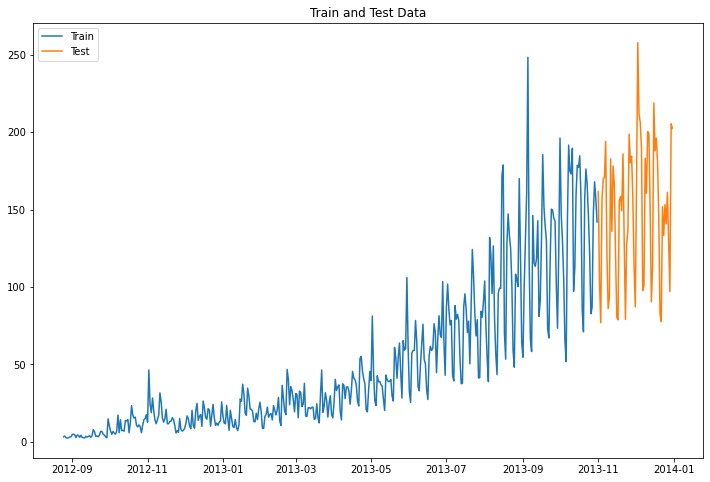

In [53]:
#plotting the data
plt.figure(figsize=(12,8))
plt.title("Train and Test Data")
plt.plot(train.index, train['Count'], label= 'Train')
plt.plot(test.index, test['Count'], label= 'Test')
plt.legend(loc='best')
plt.show()

Naive Approach with JetRail

This method consists of replicating the value of the last day value and estimate the same value for the next day.

In [56]:
dd = np.array(train.Count)
lastvalue = dd[len(dd)-1]

In [57]:
y_hat = test.copy()
y_hat['naive'] = lastvalue
y_hat.describe()

,ID,Count,naive
count,61.000000,61.000000,61.0
mean,11123.500000,149.327869,142.0
std,426.070417,43.660077,0.0
min,10403.500000,76.833333,142.0
25%,10763.500000,113.416667,142.0
50%,11123.500000,155.416667,142.0
75%,11483.500000,183.083333,142.0
max,11843.500000,257.750000,142.0


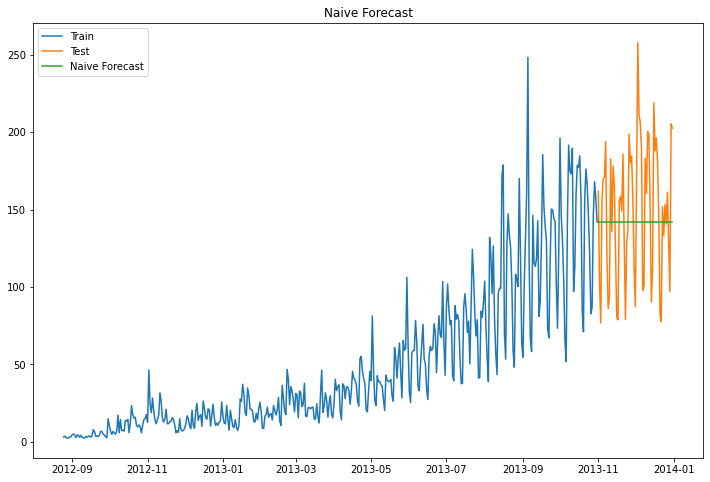

In [58]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label= 'Train')
plt.plot(test.index, test['Count'], label= 'Test')
plt.plot(y_hat.index, y_hat['naive'], label= 'Naive Forecast')
plt.legend(loc= 'best')
plt.title("Naive Forecast")
plt.show()

RMSE Calculation

In [60]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Count, y_hat.naive))
print("RMSE = "+str(rms))

RMSE = 43.91640614391676


Naive Approach with Air Passengers

In [65]:
url = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/International%20Airline%20Passengers.csv'
df = pd.read_csv(url, sep =";")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [66]:
# Creating train and test set
import math
total_size=len(df)
train_size = math.floor(0.7*total_size)
train = df.head(train_size)
test = df.tail(len(df)-train_size)
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       100 non-null    object
 1   Passengers  100 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 100 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       44 non-null     object
 1   Passengers  44 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 836.0+ bytes


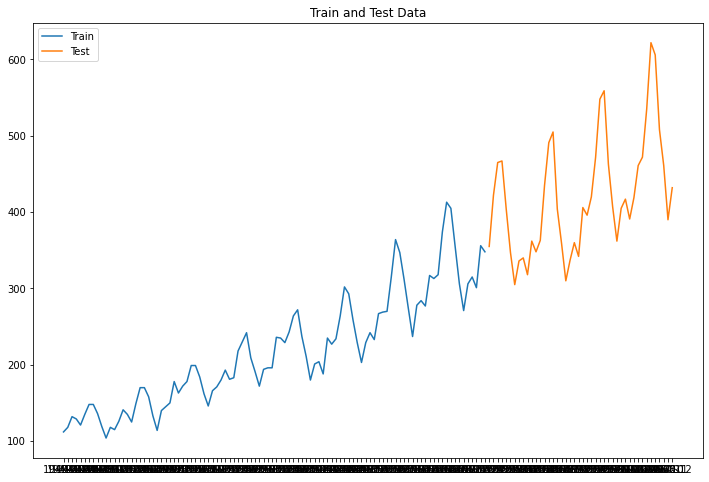

In [67]:
#plotting data
plt.figure(figsize=(12,8))
plt.plot(train.Month, train['Passengers'], label='Train')
plt.plot(test.Month, test['Passengers'], label= 'Test')
plt.title("Train and Test Data")
plt.legend(loc= 'best')
plt.show()

In [68]:
dd = np.array(train.Passengers)
lastvalue = dd[len(dd)-1]
y_hat = test.copy()
y_hat['naive'] = lastvalue
y_hat.describe()

,Passengers,naive
count,44.000000,44.0
mean,421.068182,348.0
std,77.330279,0.0
min,305.000000,348.0
25%,359.750000,348.0
50%,406.500000,348.0
75%,465.500000,348.0
max,622.000000,348.0


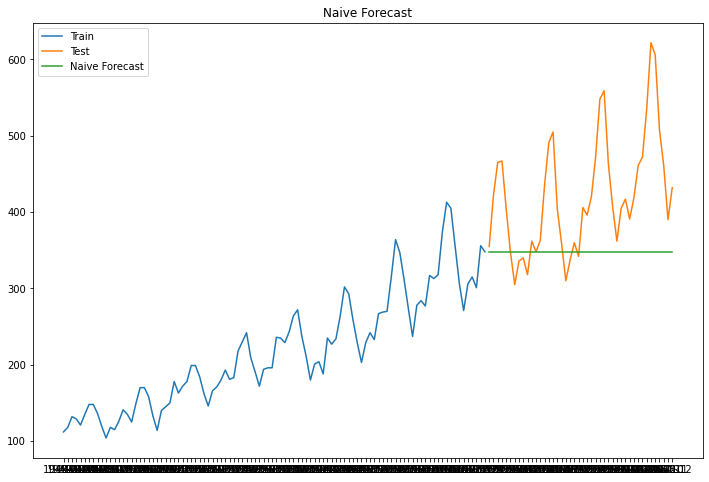

In [69]:
plt.figure(figsize=(12,8))
plt.plot(train.Month, train['Passengers'], label='Train')
plt.plot(test.Month,test['Passengers'], label='Test')
plt.plot(y_hat.Month,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

Function for Naive Approach

In [70]:
def naive_forecasting(mydf,coltime,colval,split):
    #print(split)
    import math
    global y_hat, train, test
    total_size=len(mydf)
    train_size=math.floor(split*total_size) #(70% Dataset)
    train=mydf.head(train_size)
    test=mydf.tail(len(mydf) -train_size)
    dd = np.array(train[colval])
    lastvalue = dd[len(dd)-1]
    y_hat = test.copy()
    y_hat['naive'] = lastvalue
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    plt.figure(figsize=(12,8))
    plt.plot(train[coltime], train[colval], label='Train')
    plt.plot(test[coltime],test[colval], label='Test')
    plt.plot(y_hat[coltime],y_hat['naive'], label='Naive Forecast')
    plt.legend(loc='best')
    plt.title("Naive Forecast")
    plt.show()
    rms = sqrt(mean_squared_error(test[colval], y_hat.naive))
    print('RMSE = '+str(rms))


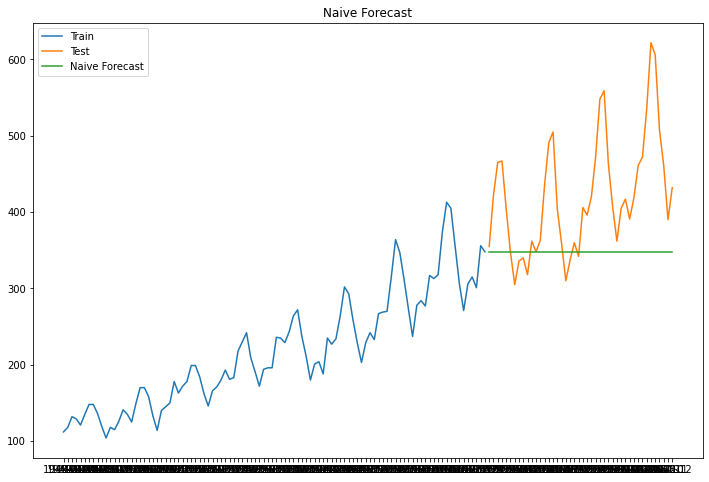

RMSE = 105.74981194911284


In [71]:
naive_forecasting(df,'Month','Passengers',0.7)

Testing Function Naive Approach with Wine Dataset

In [72]:
url = 'https://raw.githubusercontent.com/tristanga/Data-Cleaning/master/Converting%20Time%20Series/Wine_Sales_R_Dataset.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    176 non-null    object
 1   Sales   176 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


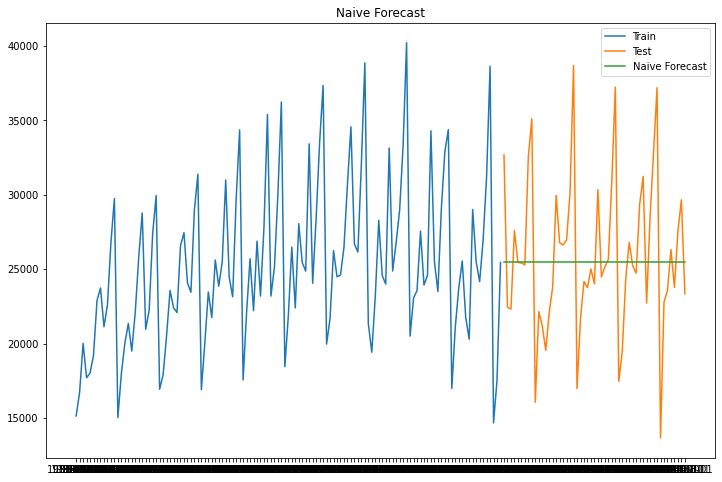

RMSE = 5207.9694862596225


In [73]:
naive_forecasting(df,'Date','Sales',0.7)